<a href="https://colab.research.google.com/github/SoyabulIslamLincoln/Learn_pytorch/blob/main/Bert_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"soyabulislam","key":"17707b61fb6ac9bda200f05294d0b109"}'}

In [2]:
!mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c 'jigsaw-toxic-comment-classification-challenge'

test_labels.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57           3056  
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44          10723  
imoore/2020-us-general-election-turnout-rates                2020 US General Election Turnout rates           4KB  2020-11-26 00:21:15           3314  
afrniomelo/3w-dataset                                        3W Dataset - Undesirable events in oil wells   658MB  2020-11-21 21:22:49            493  
patrickb1912/ipl-complete-dataset-20082020                   IPL Complete Dataset (2008-

In [7]:
import pandas as pd 
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [8]:
!pip install transformers
import transformers
from transformers import AutoModel, BertTokenizerFast

In [9]:
train= pd.read_csv('/content/train.csv.zip')

test= pd.read_csv('/content/test.csv.zip')

test_labels= pd.read_csv('/content/test_labels.csv.zip')

In [10]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [11]:
!pip install --upgrade pip
!pip install utils
!pip install config
!pip install imports

!pip install contractions


import contractions
import sys, os
import nltk
from scipy import stats
from tqdm import tqdm
from collections import OrderedDict, namedtuple

In [12]:
device= torch.device("cuda")


In [13]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [14]:
labels=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_text, temp_text, train_labels, temp_labels= train_test_split(train['comment_text'], train[labels], random_state=2018, test_size= 0.2)
print(train_text.head())
print(train_labels.head())

145869    Clearly, a legit neologism:\n\nHere is one sou...
1669      stop leaving stupid harping messages for peope...
87070     (family)I tried to look up more things on his ...
154736                        Yup done! Thanks very much! —
143557    Turkey isn't invading Syria anytime soon, also...
Name: comment_text, dtype: object
        toxic  severe_toxic  obscene  threat  insult  identity_hate
145869      0             0        0       0       0              0
1669        1             0        0       0       0              0
87070       0             0        0       0       0              0
154736      0             0        0       0       0              0
143557      0             0        0       0       0              0


In [15]:
bert= AutoModel.from_pretrained('bert-large-uncased')

tokenizer= BertTokenizerFast.from_pretrained('bert-large-uncased')

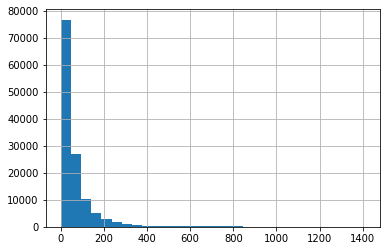

In [16]:
seq_len =[len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins=30)

In [17]:

val_text, test_text, val_labels, test_label= train_test_split(temp_text, temp_labels, random_state=2018, test_size= 0.2)
val_text

73882     "\n\n Please stop adding unreferenced controve...
36628     "\nDetail: you will loose ancestors when alrea...
152179    "\n\n Reference content check on Abkhazian Air...
113478                              6 July 2005 20:18 (UTC)
62911     "Do you see the paragraph that starts with How...
                                ...                        
41588     RE:Toe Jam \n\nI could unprotect it myself, bu...
73474     Stop Vandalism \nThis person is a religious fa...
85639     I have added something to my previous comment....
5123      Major Error \nI have removed the last paragrap...
75383     I have made the change.  This way the statisti...
Name: comment_text, Length: 25532, dtype: object

In [18]:
val_labels

,toxic,severe_toxic,obscene,threat,insult,identity_hate
73882,0,0,0,0,0,0
36628,0,0,0,0,0,0
152179,0,0,0,0,0,0
113478,0,0,0,0,0,0
62911,1,0,1,0,1,0
...,...,...,...,...,...,...
41588,0,0,0,0,0,0
73474,0,0,0,0,0,0
85639,0,0,0,0,0,0
5123,0,0,0,0,0,0


In [19]:
train_tokens= tokenizer.batch_encode_plus(train_text.to_list(), max_length= 25, pad_to_max_length= True, truncation=True)

validation_tokens= tokenizer.batch_encode_plus(val_text.to_list(), max_length= 25, pad_to_max_length= True, truncation=True)


test_tokens = tokenizer.batch_encode_plus(test_text.to_list(), max_length= 25, pad_to_max_length= True, truncation=True)

final_test_tokens= tokenizer.batch_encode_plus(test['comment_text'].to_list(), max_length= 25, pad_to_max_length= True, truncation=True)


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [20]:
print(final_test_tokens[1])

Encoding(num_tokens=25, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])


In [21]:
train_tensor= torch.tensor(train_tokens['input_ids'])
train_mask= torch.tensor(train_tokens['attention_mask'])
train_labels['all']= train_labels.values.tolist()
train_labels

,toxic,severe_toxic,obscene,threat,insult,identity_hate,all
145869,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
1669,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]"
87070,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
154736,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
143557,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...
115605,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
84745,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
80098,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
60006,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"


In [22]:
train_y= torch.tensor(train_labels['all'].tolist())
train_y[1]

tensor([1, 0, 0, 0, 0, 0])

In [23]:
val_tensor= torch.tensor(validation_tokens['input_ids'])
val_mask = torch.tensor(validation_tokens['attention_mask'])
val_labels['all']= val_labels.values.tolist()
val_y= torch.tensor(val_labels['all'].tolist())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
test_tensor = torch.tensor(test_tokens['input_ids'])
test_mask = torch.tensor(test_tokens['attention_mask'])
test_label['all']= test_label.values.tolist()
test_y= torch.tensor(test_label['all'].tolist())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
final_test_tensor = torch.tensor(test_tokens['input_ids'])
final_test_mask = torch.tensor(test_tokens['attention_mask'])
test_labels['all']= test_labels[labels].values.tolist()
final_test_y= torch.tensor(test_labels['all'].tolist())

In [26]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size= 32

train_data= TensorDataset(train_tensor, train_mask, train_y)

train_sampler= RandomSampler(train_data)

train_dataloader= DataLoader(train_data, sampler= train_sampler, batch_size= batch_size)

val_data= TensorDataset(val_tensor, val_mask, val_y)

val_sampler= RandomSampler(val_data)

val_dataloader= DataLoader(val_data, sampler= val_sampler, batch_size= batch_size)


In [27]:
for param in bert.parameters():
  param.requires_grad = False

In [ ]:
class BERT_model(nn.Module):
  def __init__(self, bert):
    super(BERT_model, self).__init__()
    self.bert = bert
    self.dropout = nn.Dropout(0.1)

    self.relu= nn.ReLU()

    self.fc1